Calculate AUC for these predictions:

In [9]:
import pandas as pd

df_roc = pd.DataFrame([
  [0.02,0],
  [0.39,1],
  [0.44,0],
  [0.49,1],
  [0.52,0],
  [0.85,1],
  [0.91,1]
], columns=['y_pred','y_test']
)
df_roc


,y_pred,y_test
0,0.02,0
1,0.39,1
2,0.44,0
3,0.49,1
4,0.52,0
5,0.85,1
6,0.91,1


In [ ]:
y_test = df_roc['y_test']
#count all classes
class_count = y_test.value_counts()
pos_count = class_count[1.0]
neg_count = class_count[0.0]

#store results here
coords = [(0,0)]
#FPR as horizontal x axis    
fp=0
#TPR as vertical y axis
tp=0

#for each truthful prediction
for truth in df_roc['y_test']:
    if truth == 1:
        tp +=1
    else:
        fp +=1
    #update result
    coords.append((fp, tp))
    
#get tally as separate lists
fp, tp = map(list, zip(*coords))

#calculate tpr and fpr
tpr = tp/pos_count
fpr = fp/neg_count

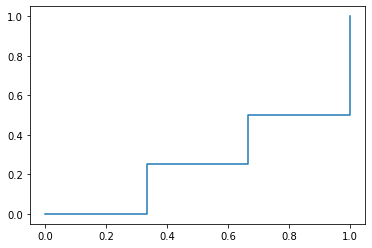

In [2]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

print('ROC: ',roc_curve(df_roc['y_test'], df_roc['y_pred']))
print('AUC',roc_auc_score(df_roc['y_test'], df_roc['y_pred']))


ROC:  (array([0.        , 0.        , 0.        , 0.33333333, 0.33333333,
       0.66666667, 0.66666667, 1.        ]), array([0.  , 0.25, 0.5 , 0.5 , 0.75, 0.75, 1.  , 1.  ]), array([1.91, 0.91, 0.85, 0.52, 0.49, 0.44, 0.39, 0.02]))
AUC 0.75


What would be a logloss value for a binary classification task, if we use constant predictor f(x) = 0.5? Round to two decimal places.

In [7]:
from sklearn.metrics import log_loss
log_loss(["1"],
         [[.5, .5]], labels=[1,0])

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


0.6931471805599453

Suppose we solve a binary classification task and our solution is scores with logloss. What predictions are more preferable in terms of logloss if true labels are y_true = [0, 0, 0, 0].

In [11]:
y_true = [0, 0, 0, 0]
y_pred1 = [0, 0, 0, 1]
y_pred2 = [0.4, 0.5, 0.5, 0.6]
y_pred3 = [0.5, 0.5, 0.5, 0.5]
print('logloss pred 1: ', log_loss(y_true, y_pred1, labels=[0,1]))
print('logloss pred 2: ', log_loss(y_true, y_pred2, labels=[1,0]))
print('logloss pred 3: ', log_loss(y_true, y_pred3, labels=[1,0]))


logloss pred 1:  8.63489399808522
logloss pred 2:  0.7033526791900091
logloss pred 3:  0.6931471805599453


In [12]:
The minimum is better

SyntaxError: invalid syntax (<ipython-input-12-1f2f40f1f5e0>, line 1)

What would be a best constant prediction for a following multi-class classification task with 4 classes? The solution is scored with multi-class logloss. The number of objects of each class in train set is: 18, 3, 15, 24.

Enter four comma separated values. Round each to two decimal places and use a leading zero before a fractional part (e.g. "0.50"; not ".5").

In [15]:
import numpy as np
y = np.array([18,3,15,24])
y_pred = y/y.sum()
y_pred

array([0.3 , 0.05, 0.25, 0.4 ])